Please give an upvote if you find this useful.

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [2]:
path = Path('../input/tabular-playground-series-jan-2021/')
train = pd.read_csv(path / 'train.csv')
test = pd.read_csv(path / 'test.csv')
sub = pd.read_csv(path / 'sample_submission.csv')

In [3]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target'],
      dtype='object')

In [5]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [6]:
from sklearn.model_selection import train_test_split
y = train['target']
x = train.drop(columns = ['target', 'id'])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 80, max_features = 'auto')
rf.fit(xtrain, ytrain)
print('Training Done using Random Forest')


Training Done using Random Forest


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

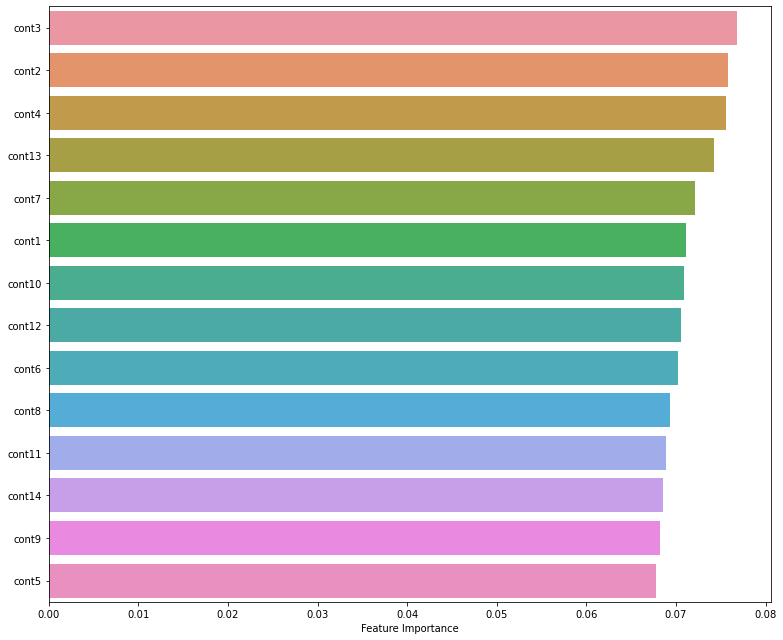

In [10]:
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize = (11, 9))
sns.barplot(x = rf.feature_importances_[ranking], y = xtrain.columns.values[ranking], orient = 'h')
ax.set_xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [16]:
import xgboost as xgb

xgb = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0.001, reg_lambda=1e-06, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer = 'Adam'):
    model = Sequential()
    model.add(Dense(xtrain.shape[1], input_dim = xtrain.shape[1], 
                    kernel_initializer = 'normal', activation = 'relu' ))
    model.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    model.compile(loss = 'mean_squared_error', optimizer = optimizer)
    return model

dl = KerasRegressor(build_fn = create_model, verbose = 0)

dl.fit(xtrain, ytrain)

In [18]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()

param_grid = {
    "boosting_type": ['gbdt'],
    "num_leaves": [9, 19],  #[ 19, 31, 37, 47],
    "max_depth": [29], #[7, 15, 29, 37, 47, 53], 
    "learning_rate": [0.1, 0.15],
    "n_estimators": [1000], #[500, 1000, 2000], 
    "subsample_for_bin": [200000], #[20000, 200000, 2000000], 
    "objective": ["regression"],
    "min_child_weight": [0.01], #[0.001, 0.01], 
    "min_child_samples":[100, 200], #[20, 50, 100], 
    "subsample":[1.0], 
    "subsample_freq":[0], 
    "colsample_bytree":[1.0], 
    "reg_alpha":[0.0], 
    "reg_lambda":[0.0]
}



In [21]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring="neg_root_mean_squared_error",
    verbose=10,
    n_jobs=-1,
    cv=5
)

model.fit(xtrain, ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.5min finished


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [1.0],
                                        'learning_rate': [0.1, 0.15],
                                        'max_depth': [29],
                                        'min_child_samples': [100, 200],
                                        'min_child_weight': [0.01],
                                        'n_estimators': [1000],
                                        'num_leaves': [9, 19],
                                        'objective': ['regression'],
                                        'reg_alpha': [0.0], 'reg_lambda': [0.0],
                                        'subsample': [1.0],
                                        'subsample_for_bin': [200000],
                                        'subsample_freq': [0]},
                   scoring='neg_root_mean_squared

In [22]:
print(f"Best score: {model.best_score_}")
print("Best parameters from the RandomSearchCV:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Best score: -0.6988952373507373
Best parameters from the RandomSearchCV:
	boosting_type: gbdt
	colsample_bytree: 1.0
	learning_rate: 0.1
	max_depth: 29
	min_child_samples: 200
	min_child_weight: 0.01
	n_estimators: 1000
	num_leaves: 19
	objective: regression
	reg_alpha: 0.0
	reg_lambda: 0.0
	subsample: 1.0
	subsample_for_bin: 200000
	subsample_freq: 0


In [23]:
lgb = model.best_estimator_

In [24]:
xtrain2 = pd.DataFrame(
    {'XGB' : xgb.predict(xtrain),
    'NN' : dl.predict(xtrain),
    'LGB' : lgb.predict(xtrain)
    }
)
xtrain2.head()

,XGB,NN,LGB
0,7.943809,7.959683,7.986910
1,7.878895,7.710484,7.871968
2,7.796670,7.546235,7.740398
3,8.052807,7.791067,8.004199
4,7.881730,7.909291,7.993076


In [27]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(xtrain2, ytrain)

LinearRegression()

In [28]:
test_data = test.drop(columns = ['id'])

In [35]:
xtest2 = pd.DataFrame( {'XGB':xgb.predict(test_data),
     'DL': dl.predict(test_data).ravel(),
     'SVR': lgb.predict(test_data),
    })

ensemble_predictions = reg.predict(xtest2)

In [36]:
submission= pd.DataFrame({'id' : test['id'], 'target': ensemble_predictions })

print(submission.head())

   id    target
0   0  8.068831
1   2  8.019305
2   6  8.002326
3   7  8.371472
4  10  8.041969


In [37]:
submission.to_csv('submission.csv', index = False)